# Change of Basis



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%precision 4
import os, sys, glob

from scipy.stats import ttest_ind as t
import matplotlib.colors as mcolors

## Covariance Function

In [3]:
def cov(x, y):
    """Returns coaraiance of vectors x and y)."""
    xbar = x.mean()
    ybar = y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

X = np.random.random(10)
Y = np.random.random(10)

np.array([[cov(X, X), cov(X, Y)], [cov(Y, X), cov(Y,Y)]])

array([[ 0.0815, -0.0111],
       [-0.0111,  0.0365]])

In [4]:
#Checking their function with the numpy covariance fuction
np.cov(X, Y) 

array([[ 0.0815, -0.0111],
       [-0.0111,  0.0365]])

In [5]:
# Extension to more vairables is done in a pair-wise way
Z = np.random.random(10)
np.cov([X, Y, Z])

array([[ 0.0815, -0.0111,  0.0153],
       [-0.0111,  0.0365,  0.002 ],
       [ 0.0153,  0.002 ,  0.1037]])

## Eigendecomposition of Covariance Matrix

### Creating random data set & creating array of covariance values

In [6]:
mu = [0,0] #mean 
sigma = [[0.6,0.2],[0.2,0.2]] #standard deviation; varX, covX,Y, covX,Y, varY
n = 1000 #number of data points
x = np.random.multivariate_normal(mu, sigma, n).T #.T= transpose x column to row or vice versa

A = np.cov(x) #matrix of covariance in data set
print (A)

#long hand calculation of covariance (example)

m = np.array([[1,2,3],[6,5,4]]) 
ms = m - m.mean(1).reshape(2,1)
#mean(1) outputs mean of each row, reshaped from row vector to column so subtraction can work
# (1) goes to rows and (0) would have done columns
#"m.mean(1).reshape(2,1)" does the same thing as np.array([2,5]).T
np.dot(ms, ms.T)/2 
#dot product of ms with its transpose results in the norm=the direction of the vector
#divided by (n-1), and n=3 

[[0.5857 0.1854]
 [0.1854 0.1983]]


array([[ 1., -1.],
       [-1.,  1.]])

### Eigenvalues and eigenvectors for covariance matrix

In [7]:
e, v = np.linalg.eig(A) #command finds the eigenvalues and vectors associated, stores them separately into e and then v
print (e)
print (v)

[0.6601 0.1238]
[[ 0.928  -0.3725]
 [ 0.3725  0.928 ]]


### Plotting the data with eigenvectors

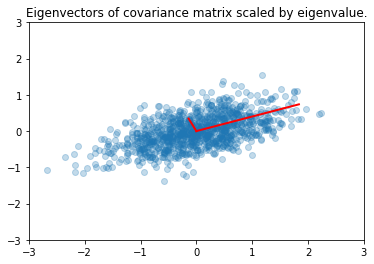

In [8]:
plt.scatter(x[0,:], x[1,:], alpha=0.27) # : means everything in that column
#"alpha" is specific to plt.scatter, has to do with how much the points blend (opacity)


for e_, v_ in zip(e, v.T): #e_ and v_ are new variables
    #zip is used to iterate over the two lists of variables simulatneaously (e1 with v1 etc)
    #need to transpose v to make the values of the v matrix correspond to the e vector
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
    # plots both eigenvectors
    # we use v_[0] and v_[1] to choose the eigenvectors separately
    # multiplied by 3 to scale it up
    #'r-' makes it red
    # lw means line width
plt.axis([-3,3,-3,3]) #defines axis for plot (-x,x,-y,y)
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');

## Change the Basis

In [10]:
ys = np.dot(v.T, x) #this performs change of basis (matrix multiplication b/w the eigenvectors and the data points)

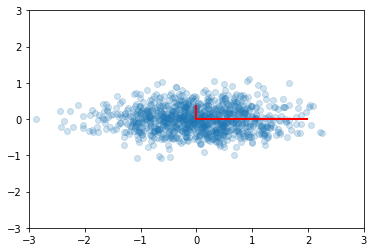

In [11]:
plt.scatter(ys[0,:], ys[1,:], alpha=0.2)
for e_, v_ in zip(e, np.eye(2)): #np.eye(2) gives an identity matrix with 2 rows, to basically replace the eigenvectors with cartesian axes
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

## Dimension Reduction

In [12]:
A

array([[0.5857, 0.1854],
       [0.1854, 0.1983]])

In [13]:
A.trace()

0.7839700562459742

In [14]:
e, v = np.linalg.eig(A) #finding eigenvalues and vectors of A
D = np.diag(e) #creates a diagonal matrix of the eigenvalues
D

array([[0.6601, 0.    ],
       [0.    , 0.1238]])

In [15]:
D.trace()

0.7839700562459742

In [ ]:
#We've shown that the trace of A (sum of the variance of our covariance matrix) is equivalent to the sum of the eigenvalues